In [41]:
import rasterio 
import fiona
import pandas as pd 
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon, box
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.crs import CRS
from rasterio.warp import calculate_default_transform, reproject, Resampling
from fiona.crs import from_epsg
import numpy as np
import os
import rasterio 
from rasterio.plot import show, show_hist
import scipy
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import rioxarray as rxr
from shapely.geometry import Point, LineString, Polygon, box
from rasterio.mask import mask
from rasterio.crs import CRS
from rasterio.warp import calculate_default_transform, reproject, Resampling
from fiona.crs import from_epsg
from scipy.spatial import cKDTree
from rasterstats import zonal_stats
import fiona


#from Part1_FinalProject import reproject, reporject_r, mask



in_data_dir = r'.//data'


In [42]:
def reprogject (layer):
    master_crs = 'EPSG:26914'
    if layer.crs != master_crs:
        #print(list_of_lables[idx], 'is not on the master projection, reprojecting now..')
        layer = layer.to_crs(master_crs) 
    print (layer.crs, 'and', master_crs)
    
    return layer

def reproject_r(in_path, out_path):
    dst_crs = 'EPSG:26914'
    with rasterio.open(in_data_dir + in_path) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        with rasterio.open(in_data_dir + out_path, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)
        print(out_path)
    return(out_path)

def mask(raster_file_in, raster_file_out):
    with fiona.open('./data/bounds/dem_bounds.shp', "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]
    with rasterio.open(in_data_dir + raster_file_in) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta
        out_meta.update({"driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform})
    with rasterio.open(in_data_dir + raster_file_out, "w", **out_meta) as dest:
        dest.write(out_image)
    print(raster_file_out)
    return(raster_file_out)




Data prep operations
 reading, buffering and saving beach buffers to new shape file
epsg:26914 and EPSG:26914

reprojecting all rasters to NAD 83 Zone 14N 
.\Pre_data\reproject_easements_ras.tif
.\Pre_data\reproject_habitat_ras.tif
.\Pre_data\reproject_navdist_ras.tif
.\Pre_data\reproject_oil_gas.tif
.\Pre_data\reproject_shipping.tif
.\Pre_data\reproject_lease.tif
.\Pre_data\reproject_wtk_conus_100m_mean_masked.tif
.\Pre_data\reproject_corpuschristi_dem.tif

clipping all dataset  to final size for analysis
.\Pre_data\Clip_reproject_easements_ras.tif
.\Pre_data\Cilp_reproject_habitat_ras.tif
.\Pre_data\Cilp_reproject_navdist_ras.tif
.\Pre_data\Cilp_reproject_oil_gas.tif
.\Pre_data\Cilp_reproject_reproject_shipping.tif
.\Pre_data\Cilp_reproject_reproject_leasem.tif
.\Pre_data\Cilp_reproject_wtk_conus_100m_mean_masked.tif
.\Pre_data\Clip_reproject_corpuschristi_dem.tif


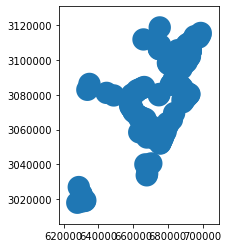

In [50]:
print('Data prep operations')

print(' reading, buffering and saving beach buffers to new shape file')
beach = gpd.read_file(os.path.join(in_data_dir, 'GDB_BeachBayAccess/BeachAccessPoints.shp'))
re_beach = reprogject(beach)
re_beach.buffer(6437)
re_beach['geometry']= re_beach.buffer(6437)
re_beach.plot()
re_beach.to_file('BeachAccessPointsBuffer.shp')

print( '\n' + 'reprojecting all rasters to NAD 83 Zone 14N ') 

reproject_easment  = reproject_r('.\\rastifs-created from geocube\\easement1.tif', '.\\Pre_data\\reproject_easements_ras.tif') 
reproject_hab  = reproject_r('.\\rastifs-created from geocube\\ppa1.tif', '.\\Pre_data\\reproject_habitat_ras.tif') 
reproject_navdist = reproject_r('.\\rastifs-created from geocube\\navdist1.tif', '.\\Pre_data\\reproject_navdist_ras.tif')
reproject_oil = reproject_r('.\\rastifs-created from geocube\\\\oilgas1.tif', '.\\Pre_data\\reproject_oil_gas.tif')
reproject_shipping = reproject_r('.\\rastifs-created from geocube\\shipping1.tif', '.\\Pre_data\\reproject_shipping.tif')
reproject_lease = reproject_r('.\\rastifs-created from geocube\\leases1.tif', '.\\Pre_data\\reproject_lease.tif')
reproject_wind = reproject_r('.\\wtk_conus_100m_mean_masked.tif', '.\\Pre_data\\reproject_wtk_conus_100m_mean_masked.tif')
reproject_dem = reproject_r('.\\corpuschristi_dem.tif', '.\\Pre_data\\reproject_corpuschristi_dem.tif')

print('\n'+ 'clipping all dataset  to final size for analysis')

mask_easment  = mask(reproject_easment, '.\\Pre_data\\Clip_reproject_easements_ras.tif')
mask_hab  = mask(reproject_hab, '.\\Pre_data\\Cilp_reproject_habitat_ras.tif') 
mask_navdist = mask(reproject_navdist, '.\\Pre_data\\Cilp_reproject_navdist_ras.tif')
mask_oil = mask(reproject_oil, '.\\Pre_data\\Cilp_reproject_oil_gas.tif')
mask_shipping = mask(reproject_shipping, '.\\Pre_data\\Cilp_reproject_reproject_shipping.tif')
mask_leases = mask(reproject_lease, '.\\Pre_data\\Cilp_reproject_reproject_leasem.tif')
mask_wind = mask(reproject_wind, '.\\Pre_data\\Cilp_reproject_wtk_conus_100m_mean_masked.tif')
mask_dem = mask(reproject_dem, '.\\Pre_data\\Clip_reproject_corpuschristi_dem.tif')
